<a href="https://colab.research.google.com/github/Devansharma/Air_Quaity_Index_Prediction/blob/master/Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Xgboost

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn import metrics
import pickle

import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv('Real_Combine.csv')
df = df.dropna()
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [14]:
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)

[16:58:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [15]:
print("R2(train data): {}".format(regressor.score(X_train, y_train)))
print("R2(test data): {}".format(regressor.score(X_test, y_test)))

R2(train data): 0.856492457223862
R2(test data): 0.757514179313912


In [16]:
score=cross_val_score(regressor, X, y, cv=10)
score.mean()

[16:58:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:58:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:58:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:58:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:58:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:58:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:58:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:58:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

0.5972638214088128

In [17]:
prediction=regressor.predict(X_test)

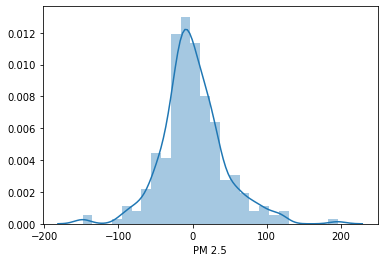

In [18]:
sns.distplot(y_test-prediction)

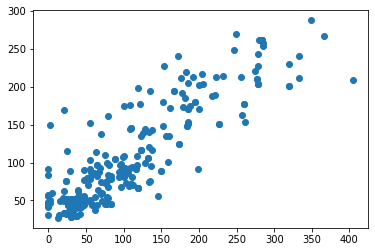

In [19]:
plt.scatter(y_test, prediction)

In [23]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
learning_rate = ['0.01', '0.05', '0.2', '0.5', '0.6', '1']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
subsample = [0.7,0.6,0.8]
min_child_weight=[3,4,5,6,7]

In [24]:
random_grid={
    'n_estimators':n_estimators,
    'learning_rate':learning_rate,
    'max_depth':max_depth,
    'subsample':subsample,
    'min_child_weight':min_child_weight,
}

In [26]:
regressor = xgb.XGBRegressor()

In [28]:
xg = RandomizedSearchCV(estimator=regressor, param_distributions=random_grid, 
                        scoring='neg_mean_squared_error', n_iter=100, cv=10, verbose=2,
                      random_state=0)

In [ ]:
xg.fit(X_train, y_train)

In [31]:
print(xg.best_params_)
print("\n",xg.best_score_)

{'subsample': 0.6, 'n_estimators': 800, 'min_child_weight': 3, 'max_depth': 20, 'learning_rate': '0.05'}

 -1162.0153920347425


In [32]:
predictions = xg.predict(X_test)

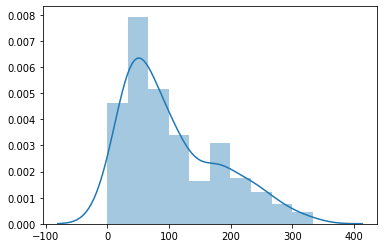

In [33]:
sns.distplot(predictions)

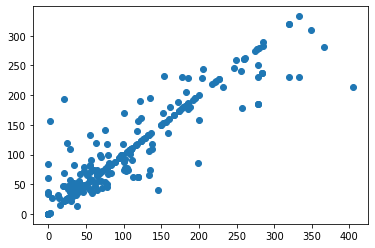

In [35]:
plt.scatter(y_test,predictions)

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 17.135682158483252
MSE: 1145.493791757363
RMSE: 33.84514428625417


In [40]:
file = open('xgboost_model.pkl', 'wb')
pickle.dump(xg, file)